In [84]:
f = open("4qln-1-A.st","r")

stems = []
#pure as gold: Purines -> A, G
purines = ['A','G']
#cut the pye: Pyrimidines -> C, T (U)
pyrimidines = ['C','U']

seq = ""

flag = True
nameOfSeq = ""
for x in f:
    tester = x
    print(tester)
    
    nameHead = tester[0:6]
    if nameHead == "#Name:":
        nameOfSeq = tester[7:-1]
    
    first = tester[0]
    if (flag) and (first != '#'):
        seq = tester
        flag = False
    
    #Collecting stems
    if first == 's':
        print(first)
        tester = tester.split(" ")
        #Indexes for begininng and end of stems
        for i in range(0,5):
            if (i == 2) or (i == 4):
                tester[i] = tester[i].split("..")
        stems.append(tester)
        

f.close()

#Name: 4qln-1-A

#Length:  119 

#PageNumber: 2

GAUCGCUGAACCCGAAGGGGCGGGGGACCCAGGGGGCGAAUCUCUUCCGAAAGGAAGAGUAGGGUUACUCCUUCGACCCGAGCCCGUCAGCUAACCUCGCAAGCGUCCGAAGGAGAAAA

...(((((..((((.))))((((((........((((....((((((((..))))))))..((((..[[[[[[[.))))..)))).........)))))))))))...]]]]]]]....

EEESSSSSMMSSSSHSSSSSSSSSSIIIIIIIISSSSMMMMSSSSSSSSHHSSSSSSSSMMSSSSHHHHHHHHHHSSSSMMSSSSIIIIIIIIISSSSSSSSSSSEEEEEEEEEEEEEE

NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNKKKKKKKNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNKKKKKKKNNNN

S1 4..8 "CGCUG" 101..105 "AAGCG"

S2 11..14 "CCCG" 16..19 "AGGG"

S3 20..25 "GCGGGG" 95..100 "CCUCGC"

S4 34..37 "GGGC" 82..85 "GCCC"

S5 42..49 "CUCUUCCG" 52..59 "AGGAAGAG"

S6 62..65 "GGGU" 76..79 "ACCC"

H1 15..15 "A" (14,16) G:A 

H2 50..51 "AA" (49,52) G:A 

H3 66..75 "UACUCCUUCG" (65,76) U:A PK{1}

I1.1 26..33 "GACCCAGG" (25,95) G:C 

I1.2 86..94 "GUCAGCUAA" (85,34) C:G 

M1.1 9..10 "AA" (8,101) G:A (11,19) C:G 

M1.2 20..19 "" (19,11) G:C (20,100) G:C 

M1

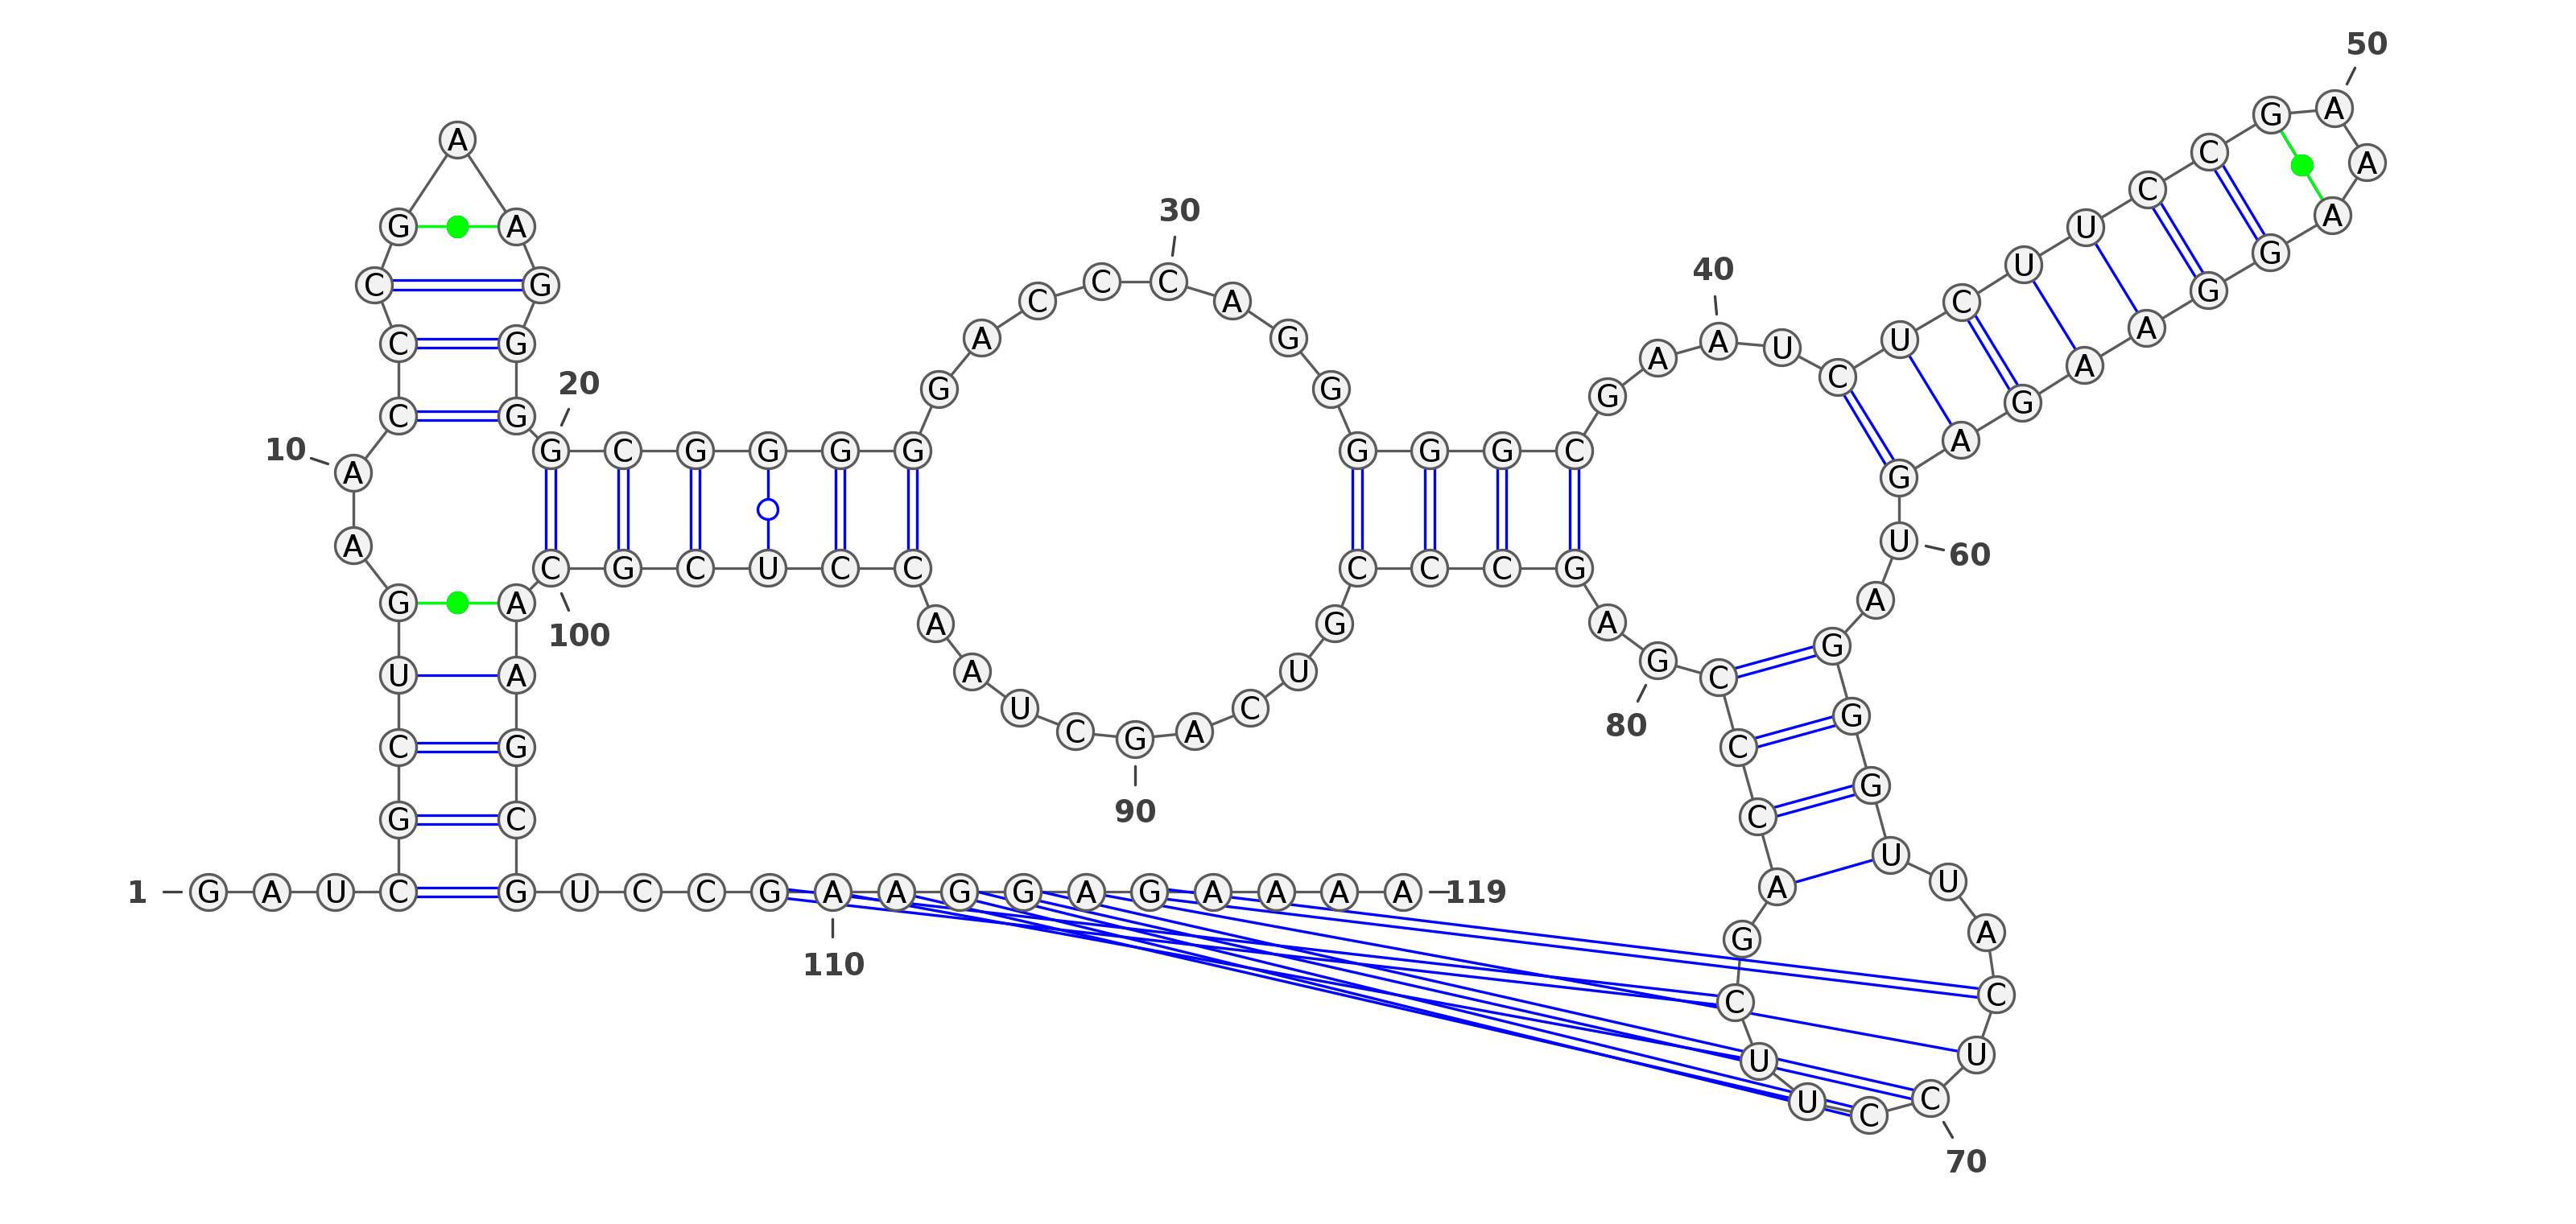

In [18]:
from IPython.display import Image
Image(filename='4qln-1-A_radiate.png') 

In [3]:
for i in stems:
    print(i)
print(seq)
print()
print("Purines:", purines)
print("Pyrimidines:", pyrimidines)

MutSeqs = []

#Array to string from geeks2geeks
def convert(s):
    new = ""
    
    for x in s:
        new += x 
    return new

def TransitionMut(cFlag,pFlag0,p0,b0,b1,seqS): #pFlag = one of the purine flags
    if cFlag:
            if (pFlag0):
                print("bp0:", b0) #bp0, start base, is a purine

                for k in range(2):
                    if b0 != purines[k]:
                        b0 = purines[k]
                        seqS[p0] = b0
                        print(b0)
                        break
            else: #bp0 is a pyrimidine
                print("bp0:", b0)
                
                for k in range(2):
                    if b0 != pyrimidines[k]:
                        b0 = pyrimidines[k]
                        seqS[p0] = b0
                        print(b0)
                        break
    print("Transition:",b0, b1)
    return seqS

def TransversionMut(cFlag,pFlag0,p0,b0,b1,seqS): #pFlag = one of the purine flags
    if cFlag:
            if (pFlag0):
                print("bp0:", b0) #bp0, start base, is a purine

                for k in range(2):
                    if b1 != pyrimidines[k]:
                        b0 = pyrimidines[k]
                        seqS[p0] = b0
                        print(b0)
                        break
            else: #bp0 is a pyrimidine
                print("bp0:", b0)
                
                for k in range(2):
                    if b1 != purines[k]:
                        b0 = purines[k]
                        seqS[p0] = b0
                        print(b0)
                        break
    print("Transversion:",b0, b1)
    return seqS

['segment1', '5bp', ['4', '8'], 'CGCUG', ['101', '105'], 'AAGCG\n']
['segment2', '4bp', ['11', '14'], 'CCCG', ['16', '19'], 'AGGG\n']
['segment3', '10bp', ['20', '37'], 'GCGGGGGACCCAGGGGGC', ['82', '100'], 'GCCCGUCAGCUAACCUCGC\n']
['segment4', '8bp', ['42', '49'], 'CUCUUCCG', ['52', '59'], 'AGGAAGAG\n']
['segment5', '4bp', ['62', '65'], 'GGGU', ['76', '79'], 'ACCC\n']
GAUCGCUGAACCCGAAGGGGCGGGGGACCCAGGGGGCGAAUCUCUUCCGAAAGGAAGAGUAGGGUUACUCCUUCGACCCGAGCCCGUCAGCUAACCUCGCAAGCGUCCGAAGGAGAAAA


Purines: ['A', 'G']
Pyrimidines: ['C', 'U']


In [49]:
SitionSeqs = []
VersSeqs = []
print("Purines:", purines)
print("Pyrimidines:", pyrimidines)

for i in stems:
    print(i)
    seqArr = list(seq.replace(" ", ""))
    for w in seqArr:
        seqVers.append(w)
        seqSition.append(w)
        seqMatch.append(w)
        seqWobble.append(w)
    
    pos0 = int(i[2][0])-1
    pos1 = int(i[4][1])-1
    bp0 = seqArr[pos0]
    bp1 = seqArr[pos1]
    
    
    purFlag0 = False
    pyrFlag0 = False
    purFlag1 = False
    pyrFlag1 = False
    
    canonFlag = False
    nonCanonFlag = False
    
    for j in range(2):
        if purines[j] == bp0:
            purFlag0 = True
        elif purines[j] == bp1:
            purFlag1 = True
        elif pyrimidines[j] == bp0:
            pyrFlag0 = True
        elif pyrimidines[j] == bp1:
            pyrFlag1 = True
    
    if purFlag0:
        print("bp0 is Pur!")
    if pyrFlag0:
        print("bp0 is Pyr!")
    if pyrFlag1:
        print("bp1 is Pyr!")
    if purFlag1:
        print("bp1 is Pur!")
    
    #Start of Stem
    if (purFlag0 and pyrFlag1) or (purFlag1 and pyrFlag0):
        print("Canonical")
        canonFlag = True
    elif (pyrFlag0 and pyrFlag1) or (purFlag1 and purFlag0):
        print("Non-canonical")
        nonCanonFlag = True
        
    print(bp0, bp1)
    #Transversion Mutation
    seqVers = TransversionMut(canonFlag,purFlag0,pos0,bp0,bp1,seqVers)
    VersSeqs.append(seqVers)
    print(convert(seqVers))
    #print(MutSeqs[0])
    
    print(bp0, bp1)
    #Transition Mutation
    seqSition= TransitionMut(canonFlag,purFlag0,pos0,bp0,bp1,seqSition)
    SitionSeqs.append(seqSition) 
    print(convert(seqSition))
    print(SitionSeqs[0])
    
    
    
    
    print()
    seqSition = []
    seqVers = []
    
    #End of Stem


Purines: ['A', 'G']
Pyrimidines: ['C', 'U']
['segment1', '5bp', ['4', '8'], 'CGCUG', ['101', '105'], 'AAGCG\n']
bp0 is Pyr!
bp1 is Pur!
Canonical
C G
bp0: C
A
Transversion: A G
GAUAGCUGAACCCGAAGGGGCGGGGGACCCAGGGGGCGAAUCUCUUCCGAAAGGAAGAGUAGGGUUACUCCUUCGACCCGAGCCCGUCAGCUAACCUCGCAAGCGUCCGAAGGAGAAAA

C G
bp0: C
U
Transition: U G
GAUUGCUGAACCCGAAGGGGCGGGGGACCCAGGGGGCGAAUCUCUUCCGAAAGGAAGAGUAGGGUUACUCCUUCGACCCGAGCCCGUCAGCUAACCUCGCAAGCGUCCGAAGGAGAAAA

['G', 'A', 'U', 'U', 'G', 'C', 'U', 'G', 'A', 'A', 'C', 'C', 'C', 'G', 'A', 'A', 'G', 'G', 'G', 'G', 'C', 'G', 'G', 'G', 'G', 'G', 'A', 'C', 'C', 'C', 'A', 'G', 'G', 'G', 'G', 'G', 'C', 'G', 'A', 'A', 'U', 'C', 'U', 'C', 'U', 'U', 'C', 'C', 'G', 'A', 'A', 'A', 'G', 'G', 'A', 'A', 'G', 'A', 'G', 'U', 'A', 'G', 'G', 'G', 'U', 'U', 'A', 'C', 'U', 'C', 'C', 'U', 'U', 'C', 'G', 'A', 'C', 'C', 'C', 'G', 'A', 'G', 'C', 'C', 'C', 'G', 'U', 'C', 'A', 'G', 'C', 'U', 'A', 'A', 'C', 'C', 'U', 'C', 'G', 'C', 'A', 'A', 'G', 'C', 'G', 'U', 'C', 'C', 'G', 'A', '

In [64]:

# print(convert(MutSeqs[0]))
print(seq)
print(len(SitionSeqs),len(VersSeqs))

for q in SitionSeqs:
    q = convert(q)
    print((q))

for q in VersSeqs:
    q = convert(q)
    print(q)

GAUCGCUGAACCCGAAGGGGCGGGGGACCCAGGGGGCGAAUCUCUUCCGAAAGGAAGAGUAGGGUUACUCCUUCGACCCGAGCCCGUCAGCUAACCUCGCAAGCGUCCGAAGGAGAAAA

5 5
GAUUGCUGAACCCGAAGGGGCGGGGGACCCAGGGGGCGAAUCUCUUCCGAAAGGAAGAGUAGGGUUACUCCUUCGACCCGAGCCCGUCAGCUAACCUCGCAAGCGUCCGAAGGAGAAAA

GAUCGCUGAAUCCGAAGGGGCGGGGGACCCAGGGGGCGAAUCUCUUCCGAAAGGAAGAGUAGGGUUACUCCUUCGACCCGAGCCCGUCAGCUAACCUCGCAAGCGUCCGAAGGAGAAAA

GAUCGCUGAACCCGAAGGGACGGGGGACCCAGGGGGCGAAUCUCUUCCGAAAGGAAGAGUAGGGUUACUCCUUCGACCCGAGCCCGUCAGCUAACCUCGCAAGCGUCCGAAGGAGAAAA

GAUCGCUGAACCCGAAGGGGCGGGGGACCCAGGGGGCGAAUUUCUUCCGAAAGGAAGAGUAGGGUUACUCCUUCGACCCGAGCCCGUCAGCUAACCUCGCAAGCGUCCGAAGGAGAAAA

GAUCGCUGAACCCGAAGGGGCGGGGGACCCAGGGGGCGAAUCUCUUCCGAAAGGAAGAGUAAGGUUACUCCUUCGACCCGAGCCCGUCAGCUAACCUCGCAAGCGUCCGAAGGAGAAAA

GAUAGCUGAACCCGAAGGGGCGGGGGACCCAGGGGGCGAAUCUCUUCCGAAAGGAAGAGUAGGGUUACUCCUUCGACCCGAGCCCGUCAGCUAACCUCGCAAGCGUCCGAAGGAGAAAA

GAUCGCUGAAACCGAAGGGGCGGGGGACCCAGGGGGCGAAUCUCUUCCGAAAGGAAGAGUAGGGUUACUCCUUCGACCCGAGCCCGUCAGCUAACCUCGCAAGCGUCCGAAGGAGAAAA

GAUCGCUGAACCCGAAGGGUCGGGGGAC

In [90]:
#Writing mut seqs onto a FASTA

MutFile = open("MutSeqs.FASTA", "w")


print(nameOfSeq)

counter = 0

for q in range(len(VersSeqs)):
    Hi = convert(VersSeqs[q])
    heading = ">" + str(nameOfSeq) + "_transversion" + str(counter) + "\n"
    print(heading)
    MutFile.write(heading)
    MutFile.write(Hi)
    counter += 1
    
for q in range(len(SitionSeqs)):
    Hi = convert(SitionSeqs[q])
    heading = ">" + str(nameOfSeq) + "_transition" + str(counter) + "\n"
    print(heading)
    MutFile.write(heading)
    MutFile.write(Hi)
    counter += 1


MutFile.close() 

4qln-1-A
>4qln-1-A_transversion0

>4qln-1-A_transversion1

>4qln-1-A_transversion2

>4qln-1-A_transversion3

>4qln-1-A_transversion4

>4qln-1-A_transition5

>4qln-1-A_transition6

>4qln-1-A_transition7

>4qln-1-A_transition8

>4qln-1-A_transition9

